<a href="https://colab.research.google.com/github/Jorgecardetegit/NLP/blob/main/Intent_classification_with_HuggingFace%F0%9F%A4%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training Dataset for chatbots/Virtual Assistants**

### **Overview**

This dataset contains example utterances and their corresponding intents from the Customer Support domain. The data can be used to train intent recognition models Natural Language Understanding (NLU) platforms.

The dataset covers the "Customer Support" domain and includes 27 intents grouped in 11 categories. These intents have been selected from Bitext's collection of 20 domain-specific datasets (banking, retail, utilities…), keeping the intents that are common across domains.

### **Utterances**

The dataset contains over 20,000 utterances, with a varying number of utterances per intent. These utterances have been extracted from a larger dataset of 288,000 utterances (approx. 10,000 per intent), including language register variations such as politeness, colloquial, swearing, indirect style… To select the utterances, we use stratified sampling to generate a dataset with a general user language register profile.

The dataset also reflects commonly ocurring linguistic phenomena of real-life chatbots, such as:

- spelling mistakes
- run-on words
- missing punctuation

### **Contents**

Each entry in the dataset contains an example utterance from the Customer Support domain, along with its corresponding intent, category and additional linguistic information. Each line contains the following four fields:

flags: the applicable linguistic flags
utterance: an example user utterance
category: the high-level intent category
intent: the intent corresponding to the user utterance.

Source: https://www.kaggle.com/datasets/bitext/training-dataset-for-chatbotsvirtual-assistants/data

# 1. Import libraries and install dependencies

In [1]:
import importlib.util

# Function to check if a library is installed
def is_library_installed(name):
    spec = importlib.util.find_spec(name)
    return spec is not None

# Check if both 'transformers' and 'datasets' are installed
if not is_library_installed('transformers') or not is_library_installed('datasets'):
    !pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 12.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf### models
import numpy as np### math computations
import pandas as pd
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import (BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives,
                                       TrueNegatives, Precision, Recall, AUC, binary_accuracy,Accuracy,
                                       TopKCategoricalAccuracy, CategoricalAccuracy,SparseCategoricalAccuracy)
from tensorflow.keras.optimizers import Adam

from datasets import load_dataset
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFDebertaForSequenceClassification,DebertaTokenizerFast)

# 2. Dataset loading

In [ ]:
import os

# Define the directory where the dataset will be extracted
dataset_dir = "/content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/"

# Define a file that should exist if the dataset has been extracted
dataset_file = os.path.join(dataset_dir, "20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv")

# Only download and extract the dataset if it doesn't already exist
if not os.path.exists(dataset_file):
    # Your commands to download and extract the dataset
    !pip install -q kaggle
    ! mkdir -p ~/.kaggle  # The -p flag ensures that mkdir does not throw an error if the directory already exists
    ! cp kaggle.json ~/.kaggle/
    !chmod 600 /root/.kaggle/kaggle.json
    !kaggle datasets download -d bitext/training-dataset-for-chatbotsvirtual-assistants
    !unzip "/content/training-dataset-for-chatbotsvirtual-assistants.zip" -d "/content/dataset/"



In [7]:
dataset=load_dataset("csv",
                       data_files= "/content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv")


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

# 3. Basic EDA

In [31]:
print(dataset["train"])

print(f"\nStructure of the dataset: {type(dataset)}")

Dataset({
    features: ['flags', 'utterance', 'category', 'intent'],
    num_rows: 21534
})

Structure of the dataset: <class 'datasets.dataset_dict.DatasetDict'>


In [19]:
for line in dataset['train'].select([0, 1, 2, 3, 4]):
  print(line)

{'flags': 'BILC', 'utterance': "I don't have an online account, what do I have to do to register?", 'category': 'ACCOUNT', 'intent': 'create_account'}
{'flags': 'BILQZ', 'utterance': 'can you tell me if i can regisger two accounts with a single email address?', 'category': 'ACCOUNT', 'intent': 'create_account'}
{'flags': 'BPLC', 'utterance': 'I have no online account, open one, please', 'category': 'ACCOUNT', 'intent': 'create_account'}
{'flags': 'BIPLD', 'utterance': 'could you ask an agent how to open an account, please?', 'category': 'ACCOUNT', 'intent': 'create_account'}
{'flags': 'BLQC', 'utterance': 'i want an online account, create one', 'category': 'ACCOUNT', 'intent': 'create_account'}


In [36]:
unique_intents = dataset['train'].unique('intent')
unique_flags = dataset['train'].unique('flags')
unique_category = dataset['train'].unique('category')
unique_utterance = dataset['train'].unique('utterance')


print(list(set(dataset["train"]["intent"])))
print(f'\nNumber of unique flags: {len(unique_intents)}')
print(f'Number of unique intents: {len(unique_flags)}')
print(f'Number of unique categories: {len(unique_category)}')
print(f'Number of unique utterances: {len(unique_utterance)}')

['create_account', 'change_order', 'check_cancellation_fee', 'review', 'contact_human_agent', 'complaint', 'edit_account', 'track_refund', 'switch_account', 'delivery_period', 'change_shipping_address', 'get_invoice', 'delivery_options', 'newsletter_subscription', 'check_refund_policy', 'check_invoices', 'registration_problems', 'payment_issue', 'track_order', 'contact_customer_service', 'delete_account', 'get_refund', 'recover_password', 'place_order', 'check_payment_methods', 'set_up_shipping_address', 'cancel_order']

Number of unique flags: 27
Number of unique intents: 511
Number of unique categories: 11
Number of unique utterances: 21513


**Flags column**

The flags column contains annotations for linguistic phenomena, which can be used to adapt bot training to different user language profile, each letter represents a linguistic phenoma. There are various letters in each flag because an intent can be classified in multiple phenomenas. In order to see what each letter represent you can check the dataset documentation in kaggle.

**Categories column**

The categories column is a high-level intent category, you can also check the kaggle documentation to see the different categories.

**Further EDA ideas**

The objetive of this very basic EDA is just to have an overview of the dataset and its different column, but I won´t carry any further analysis in this field as the main objective of this notebook is to learn how to implement a transformer model for intent classification purposes. Nevertheless I will leave you some additional ideas if you want to perform a more in depth analysis:


1. **Length Analysis:** Analyze the length of the utterances to understand the variation in text length.

2. **Word Frequency Analysis:** Implement CountVectorizer from sklearn to use vectorizers.

3. **Dataset Splits**: Compare the distributions of classes across these splits to ensure they are representative.

4. **Text Clustering**: Convert the dataset to a pandas DataFrame and apply text clustering algorithms to see if the data naturally clusters into the existing intent categories or any new potential categories.

5. **Word Clouds:** Create word clouds to visually inspect the most frequent words for each intent or category.

# 3. Preprocessing data

In [38]:
intents=list(set(dataset['train']['intent']))
dict_intents={intents[i]: i for i in range(len(intents))}
print(dict_intents)
print(len(intents))

{'create_account': 0, 'change_order': 1, 'check_cancellation_fee': 2, 'review': 3, 'contact_human_agent': 4, 'complaint': 5, 'edit_account': 6, 'track_refund': 7, 'switch_account': 8, 'delivery_period': 9, 'change_shipping_address': 10, 'get_invoice': 11, 'delivery_options': 12, 'newsletter_subscription': 13, 'check_refund_policy': 14, 'check_invoices': 15, 'registration_problems': 16, 'payment_issue': 17, 'track_order': 18, 'contact_customer_service': 19, 'delete_account': 20, 'get_refund': 21, 'recover_password': 22, 'place_order': 23, 'check_payment_methods': 24, 'set_up_shipping_address': 25, 'cancel_order': 26}
27


In [39]:
# The purpose of this function is to convert the intent column into its index representation.
def preprocess(dataset):
  return {'utterance':dataset['utterance'],
          'intent':dict_intents[dataset['intent']]}

In [ ]:
prep_dataset = dataset.map(preprocess)

In [48]:
print(f"Example of prep_dataset intent classification: {prep_dataset['train']['intent'][0]}")
print(f"Example of dataset intent classification: {dataset['train']['intent'][0]}")

Example of prep_dataset classification: 0
Example of dataset classification: create_account


# 4. Model Preparation

### Deberta Model

**DeBERTa (Decoding-enhanced BERT with Disentangled Attention)** is a transformer model proposed in a paper by Microsoft Research. It introduces two significant enhancements to the original BERT architecture, which aim to improve its handling of token representations and attention score which consist of **enhancements to the attention mechanism** and the **introduction of a mask decoder**.

For a better understanding of this model you can check the HuggingFace documentation or its orginal paper:

https://huggingface.co/docs/transformers/v4.34.1/en/model_doc/deberta#overview

https://arxiv.org/abs/2006.03654


### Deberta version

**Problem importing recent versions**

At the time this notebook is being posted any version higher than the first one it is private in hugging face, meaning that you don´t have access to it. If you try to load any of these versions you will get the following error:

*"LocalTokenNotFoundError: Token is required (`token=True`), but no token found. You need to provide a token or be logged in to Hugging Face with `huggingface-cli login` or `huggingface_hub.login`"*

**Version we will be using**

Taking this into account we will use the first version, nevertheless you can check if the older versions are availabel at the time you are running this notebook.

**Tokens in HuggingFace**

You might be wondering what are tokens and how they work in hugging face, to know more about tokens in HuggingFace you can visit the following link: https://huggingface.co/docs/hub/security-tokens



### HuggingFace tokenizer steps
I will play Football todáy!

  - *Standardization (uncased)*: i will play football today!
  - *Word splitting*: "i" "will" "play" "football" "today" "!"
  - *Subword level tokenization*:
    
      - bpe:  "foot" "ball"
      - wordpiece: "foo" "t" "ball"
      - sentencepiece: "▁football"

  - *Numericalization*: Each character in the text is mapped to a unique integer ID.
  - Postpreprocessing: "[CLS]", "i" "will" "play" "football" "today" "!" "[SEP]"

In [54]:
model_id="microsoft/deberta-base"
tokenizer = DebertaTokenizerFast.from_pretrained(model_id)
# Check DebertaTokenizerFast in the documentation: https://huggingface.co/docs/transformers/v4.34.1/en/model_doc/deberta#transformers.DebertaTokenizerFast

def tokenizer_function(dataset):
  return tokenizer(dataset["utterance"],)

In [55]:
tokenized_dataset=prep_dataset.map(tokenizer_function)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [56]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21534
    })
})

In [57]:
tokenized_dataset["train"][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 0,
 'input_ids': [1,
  100,
  218,
  75,
  33,
  41,
  804,
  1316,
  6,
  99,
  109,
  38,
  33,
  7,
  109,
  7,
  5124,
  116,
  2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [61]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")
# objects that will form a batch by using a list of dataset elements as input,
# Doc: https://huggingface.co/docs/transformers/main_classes/data_collator

BATCH_SIZE = 16
tf_dataset = tokenized_dataset["train"].to_tf_dataset(
    columns=['input_ids','attention_mask', 'intent'],
    shuffle=True,
    batch_size=BATCH_SIZE,
    collate_fn=data_collator
)
# Converts the dataset into a tf dataset

def swap_positions(dataset):
  return {'input_ids':dataset['input_ids'],
          'attention_mask':dataset['attention_mask'],},dataset['intent']

# Rearrange the dataset so that the inputs come before the ouput intent.

In [62]:
tf_dataset=tf_dataset.map(swap_positions)

train_dataset=tf_dataset.take(int(0.9*len(tf_dataset)))
val_dataset=tf_dataset.skip(int(0.9*len(tf_dataset)))

# Train and val_data creation, shuffle was already carried out.

In [63]:
for i in tf_dataset:
  print(i)
  break

({'input_ids': <tf.Tensor: shape=(16, 27), dtype=int64, numpy=
array([[    1,   100,    33,    41,   696,  2746,     6,    64,    38,
          266,    24,   116,     2,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    1,  7424,    47,  1137,   162,   141,  1010,    38,    64,
         1057,   127,  3682,   116,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    1,  7424,    47,   311,   162,     5,  1047,     9, 19458,
         1841,   116,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    1,   100,   300,    41,  5849,    77,    38,  3751,     7,
          582,     6,    53,   127,  1886,    21,  1855,  1322,  4462,
         6992,     6,   141,   109,    38,   266,    24,   116,     2],
       [    1,  7424,    38,  1045,    55,    87,    65,  1316,    19,
          

# 5. Model Architecture

### TFDebertaForSequenceClassification

In [64]:
model=TFDebertaForSequenceClassification.from_pretrained(model_id,num_labels=len(intents))
model.summary()

# Doc: https://huggingface.co/docs/transformers/v4.34.1/en/model_doc/deberta

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['cls_dropout', 'classifier', 'pooler']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLaye  multiple                  138601728 
 r)                                                              
                                                                 
 pooler (TFDebertaContextPo  multiple                  590592    
 oler)                                                           
                                                                 
 cls_dropout (TFDebertaStab  multiple                  0         
 leDropout)                                                      
                                                                 
 classifier (Dense)          multiple                  20763     
                                                                 
Total params: 139213083 (531.06 MB)
Trainable params: 139213083 (531.06 MB)
Non-trainable para

In [65]:
num_epochs = 2
batches_per_epoch = len(tokenized_dataset["train"]) // BATCH_SIZE
total_train_steps = int(batches_per_epoch * num_epochs)

In [66]:
optimizer, schedule = create_optimizer(init_lr=2e-5,num_warmup_steps=0, num_train_steps=total_train_steps)


In [67]:
model.compile(optimizer=optimizer,
    metrics=["accuracy"])

In [68]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2,)

Epoch 1/2


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


1211/1211 [==============================] - 418s 248ms/step - loss: 0.2822 - accuracy: 0.9358 - val_loss: 0.0077 - val_accuracy: 0.9991
Epoch 2/2
1211/1211 [==============================] - 268s 221ms/step - loss: 0.0113 - accuracy: 0.9982 - val_loss: 0.0025 - val_accuracy: 0.9995


# 6. Evaluation

As we can see in the second epoch the accuracy is 0.9882 and the val_accuracy is 0.9995, meaning that the models prediction are almost perfect.

We have to be careful when we get this results with just 2 epochs, is true that this models are very powerful and can achieve very precise reults, nevertheless this accuracy also can be explained by the dataset, meaning that is very robust and it doesn´t have a lot of variability. We should be careful with this and understand that even the model has achieved perfection in the training phase it doesn´t mean that it will be perfect when we deploy it in the real world.

I will analyze a bit more in depth the model results:

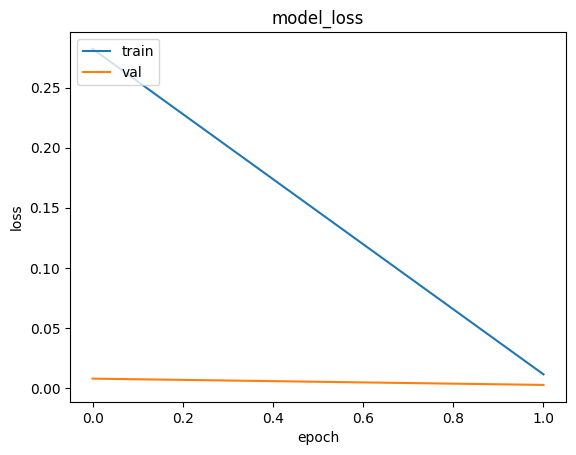

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

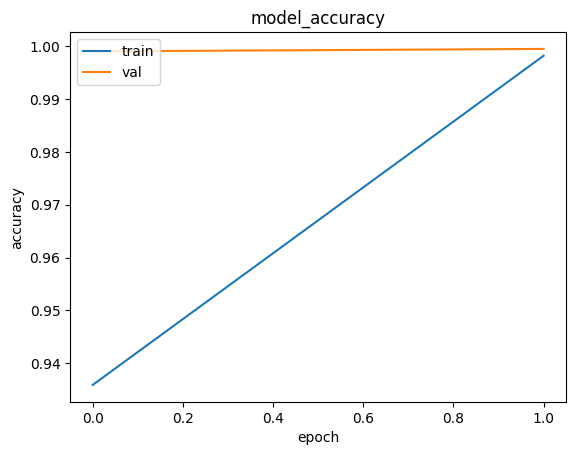

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Confusion matrix**

In [71]:
predicted = []
labels = []

for input, label in val_dataset:
  predicted.append(model(**input).logits)
  labels.append(label.numpy())

In [72]:
pred=np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()])
lab=np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])

[[215   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0  97   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0  47   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0  60   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  93   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  76   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  30   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  28   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 

Text(0.5, 146.7222222222222, 'Predicted')

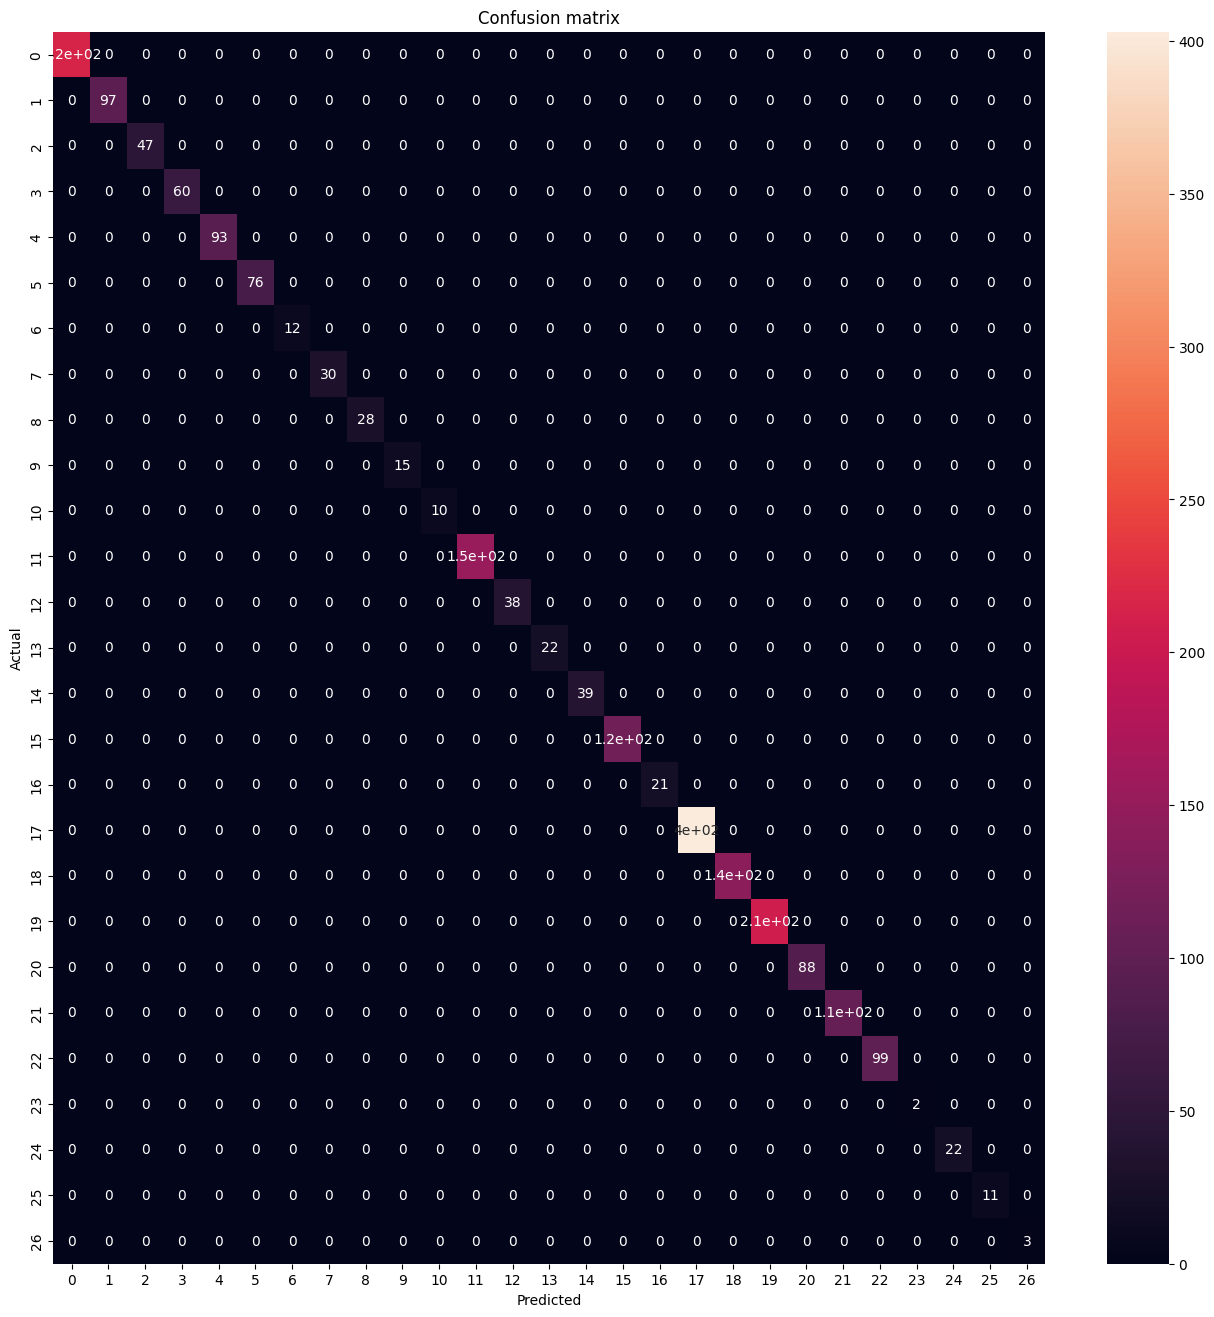

In [73]:
cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(16,16))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# 7. Testing

In [79]:
inputs = tokenizer(["Please how do i go about the account creation? ",
                    "After setting up my account, i feel like i need to change it. How do i go about that?",
                    "how do i know how much i need to pay?",
                    "purchased a product, which i now want to change"
                    ], padding=True,return_tensors="tf")

logits = model(**inputs).logits
outputs=tf.argmax(logits,axis=-1).numpy()

index_to_label = {v: k for k, v in dict_intents.items()}
output_labels = [index_to_label[idx] for idx in outputs]

print(output_labels)

['create_account', 'switch_account', 'check_payment_methods', 'change_order']
